# Анализ крупного интернет-магазина

Целью данного исследования является анализ крупного интернет-магазина. 

Был подготовлен список гипотез для увеличения выручки, первой целью исследования является их приоритизация.
Вторая цель - проведение A/B-теста и анализ результатов. 

Исследование состоит из двух частей:
* Часть 1. Приоритизация гипотез
* Часть 2. Анализ A/B-теста

Для каждой части анализа имеются свои отдельные датафреймы: 1 датафрейм для первой части и 2 датафрейма для второй.

Сама работа состоит из четырёх глав:
* В Главе 1 будет проведена подготовка к анализу, а именно: осуществлена загрузка библиотек, данных, проведён первичный анализ каждого из трёх датафреймов и первичная обработка данных.
* В Главе 2 будет выполнена приоритизация гипотез.
* В Главе 3 будет проведён анализ A/B-теста.
* В Главе 4 будут ещё раз кратко представлены результаты исследования и подведены итоги.

## Подготовка к анализу

Перед началом исследования  

Загрузка библиотек и выбор формата:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from math import sqrt
import math 
from scipy import stats as st
from scipy.stats import binom, norm
import scipy.stats as stats
from datetime import datetime as dt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.2f}'.format

Загрузка данных (всего 3 датасета - hypothesis, orders и visitors):

Создание универсальной формулы для первичного анализа:

In [3]:
def first_analysis(data):
    print(data.shape)
    data.info()
    print(data.describe())
    display(data.head())
    print(data.duplicated().sum())

**Первый датафрейм:**

In [4]:
first_analysis(hypothesis)

(9, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
       Reach  Impact  Confidence  Efforts
count   9.00    9.00        9.00     9.00
mean    4.78    4.78        5.56     4.89
std     3.15    3.19        3.05     2.80
min     1.00    1.00        1.00     1.00
25%     3.00    3.00        3.00     3.00
50%     3.00    3.00        7.00     5.00
75%     8.00    7.00        8.00     6.00
max    10.00   10.00        9.00    10.00


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


0


Датафрейм содержит 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Efforts. В нём 9 строк и 5 столбцов. 

Названия колонок:
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Пропусков нет, дубликатов нет. Названия столбцов следует переписать в соответствии со "змеиным стилем". Типы столбцов заданы правильно.

In [5]:
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Колонки успешно переименованы.

**Второй датафрейм:**

In [6]:
first_analysis(orders)

(1197, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
       transactionId     visitorId    revenue
count        1197.00       1197.00    1197.00
mean   2155621385.53 2165960143.10    8348.01
std    1229084904.76 1236014192.15   39191.13
min       1062393.00    5114589.00      50.00
25%    1166775572.00 1111826046.00    1220.00
50%    2145193898.00 2217984702.00    2978.00
75%    3237740112.00 3177606451.00    8290.00
max    4293855558.00 4283872382.00 1294500.00


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


0


В датафрейме с информацией о заказах 5 столбцов и 1197 строк. Названия столбцов:

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Названия столбцов следует переписать в соответствии со "змеиным стилем", пропусков нет, дубликатов нет. Необходимо задать правильный тип столбца date.

In [7]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders['date']= pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [8]:
sorted(orders['date'].unique())

[numpy.datetime64('2019-08-01T00:00:00.000000000'),
 numpy.datetime64('2019-08-02T00:00:00.000000000'),
 numpy.datetime64('2019-08-03T00:00:00.000000000'),
 numpy.datetime64('2019-08-04T00:00:00.000000000'),
 numpy.datetime64('2019-08-05T00:00:00.000000000'),
 numpy.datetime64('2019-08-06T00:00:00.000000000'),
 numpy.datetime64('2019-08-07T00:00:00.000000000'),
 numpy.datetime64('2019-08-08T00:00:00.000000000'),
 numpy.datetime64('2019-08-09T00:00:00.000000000'),
 numpy.datetime64('2019-08-10T00:00:00.000000000'),
 numpy.datetime64('2019-08-11T00:00:00.000000000'),
 numpy.datetime64('2019-08-12T00:00:00.000000000'),
 numpy.datetime64('2019-08-13T00:00:00.000000000'),
 numpy.datetime64('2019-08-14T00:00:00.000000000'),
 numpy.datetime64('2019-08-15T00:00:00.000000000'),
 numpy.datetime64('2019-08-16T00:00:00.000000000'),
 numpy.datetime64('2019-08-17T00:00:00.000000000'),
 numpy.datetime64('2019-08-18T00:00:00.000000000'),
 numpy.datetime64('2019-08-19T00:00:00.000000000'),
 numpy.datet

Изменения успешно внесены. Датафрейм включает в себя данные за весь август 2019 года, с 01.08.2019 по 31.08.2019.

**Третий датафрейм:**

In [9]:
first_analysis(visitors)

(62, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
       visitors
count     62.00
mean     607.29
std      114.40
min      361.00
25%      534.00
50%      624.50
75%      710.50
max      770.00


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


0


Датафрейм содержит информацию о пользователях. В нём 62 строки и 3 столбца. Названия столбцов:

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Названия столбцов заданы в соответствии со "змеиным стилем", пропусков нет, дубликатов нет. Необходимо задать правильный типы столбца date.

In [10]:
visitors['date']= pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
sorted(visitors['date'].unique())

[numpy.datetime64('2019-08-01T00:00:00.000000000'),
 numpy.datetime64('2019-08-02T00:00:00.000000000'),
 numpy.datetime64('2019-08-03T00:00:00.000000000'),
 numpy.datetime64('2019-08-04T00:00:00.000000000'),
 numpy.datetime64('2019-08-05T00:00:00.000000000'),
 numpy.datetime64('2019-08-06T00:00:00.000000000'),
 numpy.datetime64('2019-08-07T00:00:00.000000000'),
 numpy.datetime64('2019-08-08T00:00:00.000000000'),
 numpy.datetime64('2019-08-09T00:00:00.000000000'),
 numpy.datetime64('2019-08-10T00:00:00.000000000'),
 numpy.datetime64('2019-08-11T00:00:00.000000000'),
 numpy.datetime64('2019-08-12T00:00:00.000000000'),
 numpy.datetime64('2019-08-13T00:00:00.000000000'),
 numpy.datetime64('2019-08-14T00:00:00.000000000'),
 numpy.datetime64('2019-08-15T00:00:00.000000000'),
 numpy.datetime64('2019-08-16T00:00:00.000000000'),
 numpy.datetime64('2019-08-17T00:00:00.000000000'),
 numpy.datetime64('2019-08-18T00:00:00.000000000'),
 numpy.datetime64('2019-08-19T00:00:00.000000000'),
 numpy.datet

Тип столбца успешно сменён. Датафрейм visitors включает в себя данные за весь август 2019 года, с 01.08.2019 по 31.08.2019, также, как и датафрейм orders.

Предобработка данных завершена.

**Выводы:**

Всего для работы предоставлены 3 датафрейма:

* Датафрейм hypothesis, содержащий 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Всего в нём 9 строк и 5 столбцов.
* Датафрейм orders с информацией о заказах. Всего в датафрейме 1197 строк и 5 столбцов.
* Датафрейм visitors, содержащий информацию о пользователях. Всего в датафрейме 62 строки и 3 столбца.

Предоставленные датасеты содержат качественную информацию, на основании которой можно провести исследование. Пропусков и дубликатов обнаружено не было. Проведена следующая обработка:
* В датафрейме hypothesis были переписаны названия столбцов в соответствии со "змеиным стилем".
* В датафрейме orders были переписаны названия столбцов в соответствии со "змеиным стилем", а также задан правильный тип столбца date.
* В датафрейме visitors был задан правильный тип столбца date.

Датафреймы orders и visitors включает в себя данные за одинаковый период, а именно - весь август 2019 года, с 01.08.2019 по 31.08.2019, что делает возможным анализ данных обоих датасетов одновременно.

## Приоритизация гипотез

В первой части исследования будет задействован только датафрейм hypothesis, который был изучен в прошлой главе. 
С целью приоритизации гипотез будут использованы:
* фреймворк ICE 
* фреймворк RICE

Полученные результаты будет сравнены друг с другом.

### Фреймворк ICE

Приоритизация гипотез с применением фреймворка ICE, с добавлением колонки в новый датафрейм - двойника датафрейма hypothesis:

In [12]:
hypothesis_2 = hypothesis

hypothesis_2['ICE'] = (hypothesis_2['impact'] * hypothesis_2['confidence']) / hypothesis_2['efforts']
print(hypothesis_2[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

ТОП-3 гипотезы в соответствии со фреймворком ICE:
* Номер 8: "Запустить акцию, дающую скидку на товар в день рождения" - 16.20 
* Номер 0: "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" - 13.33 
* Номер 7: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" - 11.20  

Наименее приоритетная - гипотеза за номером 4, "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей".

### Фреймворк RICE

Будет также проведена приоритизация гипотез с помощью фреймворка RICE.

In [13]:
hypothesis_2['RICE'] = (hypothesis_2['reach'] * hypothesis_2['impact'] * hypothesis_2['confidence']) / hypothesis_2['efforts']
print(hypothesis_2[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

ТОП-3 гипотезы в соответствии с фреймворком ICE:

* Номер 7: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" - 112.00   
* Номер 2: "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" - 56.00   
* Номер 0: "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" - 40.00    
* Номер 6: "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" - 40.00

Наименее приоритетная - всё ещё гипотеза за номером 4, "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей", в этот раз с оценкой в 3 балла.

**Сравнение фреймворков**

Разница между фреймворками заключается в использовании в RICE дополнительного параметра Reach - скольких пользователей затронет изменение, которое намереваются внести. Так, гипотеза-лидер при использовании фреймворка ICE - "Запустить акцию, дающую скидку на товар в день рождения" - касается только части пользователей, в то время как добавление форм подписок на все основные страницы (ТОП-гипотеза при использовании фреймворка RICE) - касается сразу всех, что и объясняет её лидирующее положение в данном рейтинге. 

Примечательно, что гипотезы под номером 0 и 7 вошли в оба ТОП-3 - это гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", а гипотезы 4 и 5 остались в числе ТОП-3 аутсайдеров в обоих рейтингах. 

## Анализ A/B-теста

Данная глава посвящена анализу A/B-теста, результаты которого представлены в датафреймах orders и visitors. 

### График кумулятивной выручки по группам

Будет создан массив уникальных пар значений дат и групп теста.

In [14]:
dates_and_groups = orders[['date', 'group']].drop_duplicates().sort_values(by = ['date', 'group'])
dates_and_groups

,date,group
55,2019-08-01,A
66,2019-08-01,B
175,2019-08-02,A
173,2019-08-02,B
291,2019-08-03,A
...,...,...
496,2019-08-29,B
730,2019-08-30,A
690,2019-08-30,B
958,2019-08-31,A


Собраны агрегированные кумулятивные по дням данные о заказах:

In [15]:
orders_agg = dates_and_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by = ['date', 'group'])


visitors_agg = dates_and_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,).sort_values(by = ['date', 'group'])


cumul_data = orders_agg.merge(
    visitors_agg, left_on=['date', 'group'], right_on=['date', 'group']
)
cumul_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

print(cumul_data)

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   148579       719
1  2019-08-01     B      21      20   101217       713
2  2019-08-02     A      44      38   242401      1338
3  2019-08-02     B      45      43   266748      1294
4  2019-08-03     A      68      62   354874      1845
..        ...   ...     ...     ...      ...       ...
57 2019-08-29     B     596     544  5559398     17708
58 2019-08-30     A     545     493  4022970     18037
59 2019-08-30     B     620     567  5774631     18198
60 2019-08-31     A     557     503  4084803     18736
61 2019-08-31     B     640     586  5907760     18916

[62 rows x 6 columns]


Теперь можно построить графики кумулятивной выручки по дням и группам A/B-тестирования: 

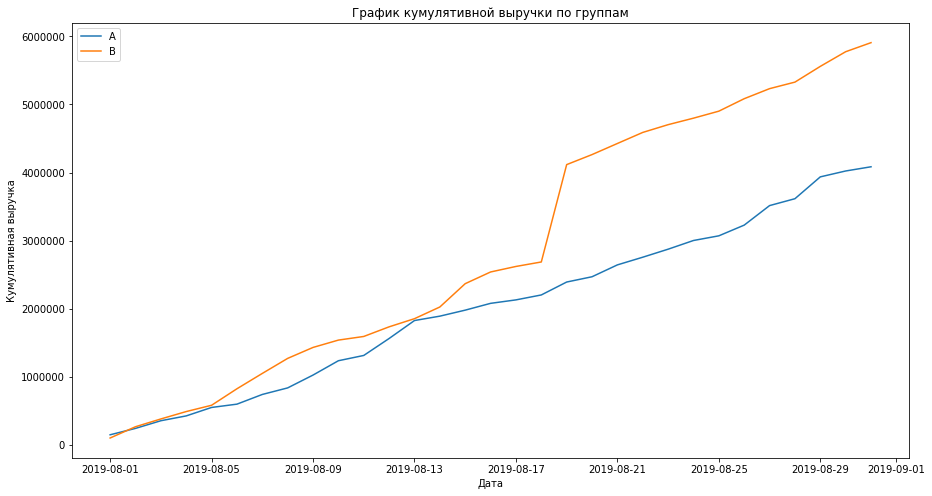

In [16]:
cumul_revenue_a = cumul_data[cumul_data['group']=='A'][['date','revenue', 'orders']]

cumul_revenue_b = cumul_data[cumul_data['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,8))

plt.title('График кумулятивной выручки по группам')

plt.xlabel('Дата') 

plt.ylabel('Кумулятивная выручка') 

plt.plot(cumul_revenue_a['date'], cumul_revenue_a['revenue'], label='A')

plt.plot(cumul_revenue_b ['date'], cumul_revenue_b ['revenue'], label='B')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.legend();

**Выводы и предположения:**

График наглядно демонстрирует следующее:
* кумулятивная выручка у группы B почти всегда равно или выше кумулятивной выручки у группы А. 
* кумулятивные выручки у обеих групп постоянно увеличивается, что является хорошим знаком:
    * у группы А выручка растёт равномерно;
    * у группы B был резкий скачок 18.08.2019.
    
Резкий рост выручки может означать либо всплеск числа заказов, либо появление очень дорогих заказов в выборке. Необходимо построить график кумулятивного среднего чека по группам с целью выяснения причины роста.

### График кумулятивного среднего чека по группам

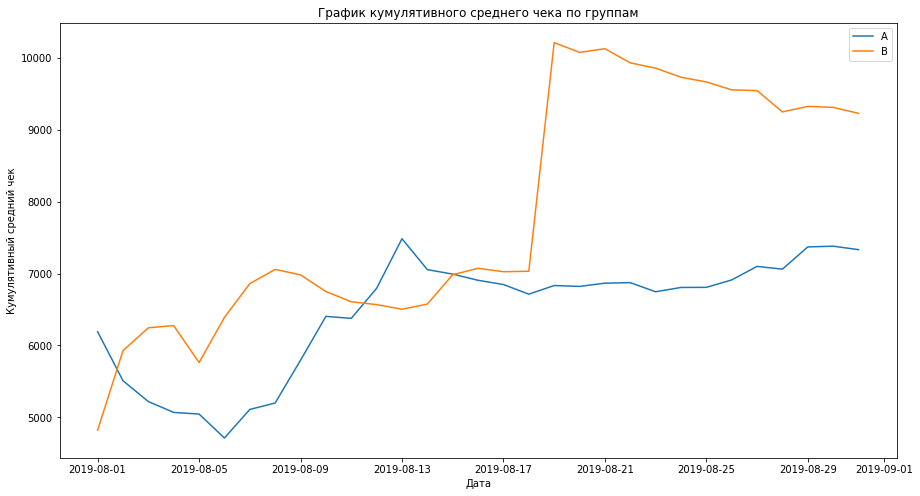

In [17]:
plt.figure(figsize=(15,8))

plt.title('График кумулятивного среднего чека по группам')

plt.xlabel('Дата') 

plt.ylabel('Кумулятивный средний чек') 

plt.plot(cumul_revenue_a['date'], cumul_revenue_a['revenue']/cumul_revenue_a['orders'], label='A')

plt.plot(cumul_revenue_b['date'], cumul_revenue_b['revenue']/cumul_revenue_b['orders'], label='B')

plt.legend();

**Выводы и предположения:**

Кумулятивный средний чек у группы B сильно вырос после 18 августа, что говорит о попадании в выборку очень дорогих (для данной выборки) заказов. В большинстве случаев кумулятивный средний чек у группы В заметно выше, чем кумулятивный средний чек у группы А.

Будет построен и изучен график относительного изменения кумулятивного среднего чека группы B к группе A.

### График относительного изменения кумулятивного среднего чека группы B к группе A

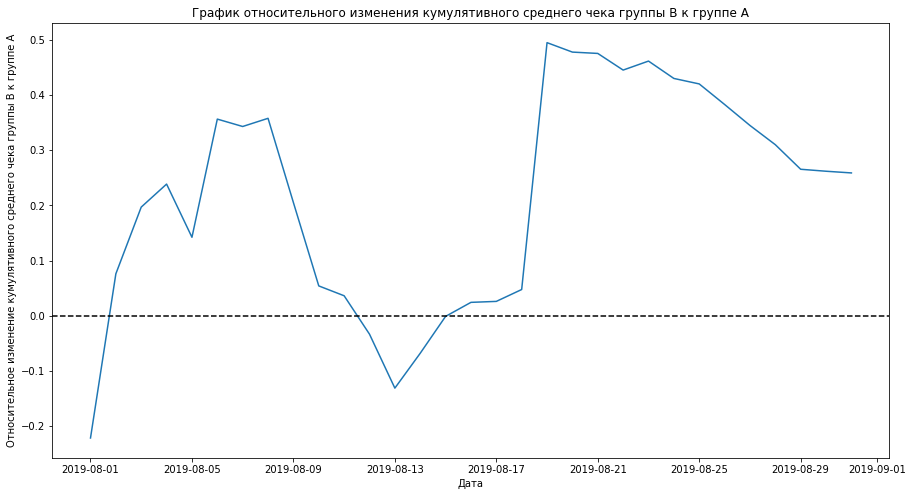

In [18]:
plt.figure(figsize=(15,8))

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

plt.xlabel('Дата') 

plt.ylabel('Относительное изменение кумулятивного среднего чека группы B к группе A') 

merged_cumul_rev = cumul_revenue_a.merge(cumul_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(merged_cumul_rev['date'], (merged_cumul_rev['revenueB']/merged_cumul_rev['ordersB'])/(merged_cumul_rev['revenueA']/merged_cumul_rev['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--');

**Выводы и предположения:**

На графике заметны резкие «скачки», что говорит о наличии аномалий, включая крупные заказы, которые были обнаружены ранее. В целом показатели группы В выше аналогичных показателей группы А, не считая двух краткосрочных "провалов" в начале и середине исследуемого периода.

Будет также изучен график кумулятивного среднего количества заказов на посетителя по группам.

### График кумулятивного среднего количества заказов на посетителя по группам

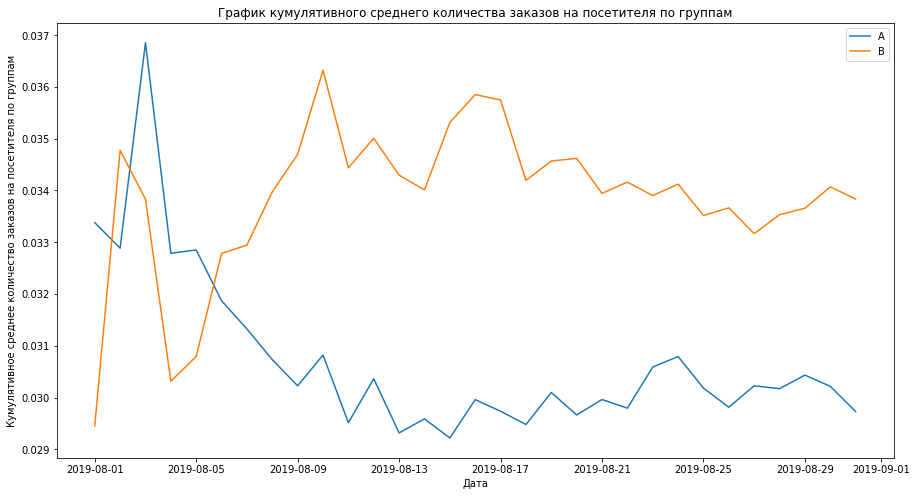

In [19]:
cumul_data['conversion'] = cumul_data['orders']/cumul_data['visitors']

cumul_data_a = cumul_data[cumul_data['group']=='A']

cumul_data_b = cumul_data[cumul_data['group']=='B']

merged_cumul_conv = cumul_data_a[['date','conversion']].merge(cumul_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.figure(figsize=(15,8))

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')

plt.xlabel('Дата') 

plt.ylabel('Кумулятивное среднее количество заказов на посетителя по группам') 

plt.plot(cumul_data_a['date'], cumul_data_a['conversion'], label='A')

plt.plot(cumul_data_b['date'], cumul_data_b['conversion'], label='B')

plt.legend();

График показывает, что сначала значения "прыгали", при этом результаты группы А были намного выше, чем у группы B. Однако после 06.08.2019 ситуация сильно изменилась: значения группы В сильно выросли и с тех кумулятивное среднее количество заказов на посетителя у группы В всегда было намного выше, чем у группы А: если у группы В среднее количество заказов осцилировало вокруг значения 0,034, то у группы А кумулятивное среднее количество заказов сильно просело и начало осцилировать вокруг значения 0,030. 

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

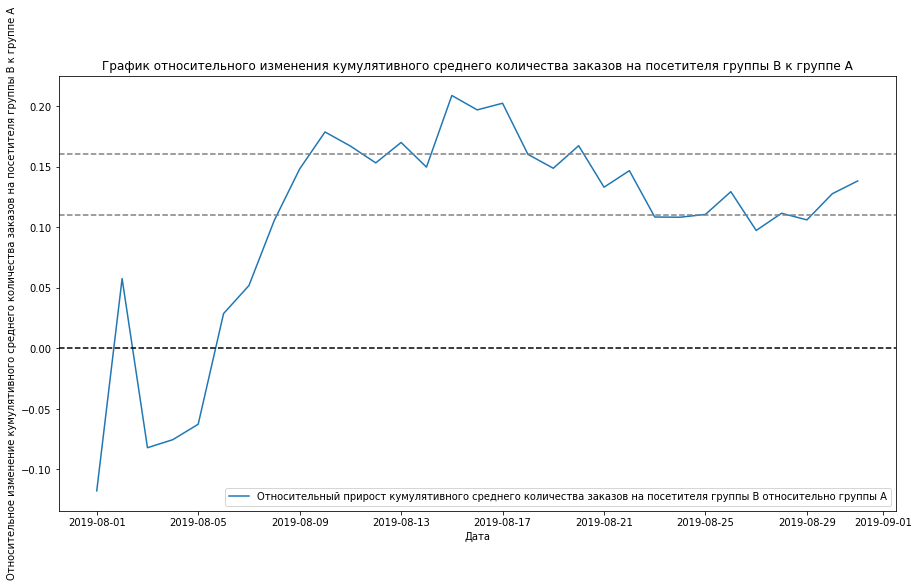

In [20]:
plt.figure(figsize=(15,8))

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')

plt.xlabel('Дата') 

plt.ylabel('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A') 

plt.plot(merged_cumul_conv ['date'], merged_cumul_conv ['conversionB']/merged_cumul_conv ['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")

plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.11, color='grey', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--');

**Выводы и предположения:**

В начале теста группа В проигрывала группе А, не считая одной кратковременной "победы" (первый пик на графике). Но после 05.08.2019 группа В заметно вырвалась вперёд, и хотя значение относительного изменения постоянно колебалось, осцилируя вокруг значений 0,16, а позже 0,11, группа В на протяжении всего отрезка времени выигрывала у группы А. Ухудшение результата группы B (с 0,16 до 0,11) после 21.08.2019 совпадает по времени с падением значения кумулятивного среднего чека данной группы.

### Количество заказов на одного пользователя

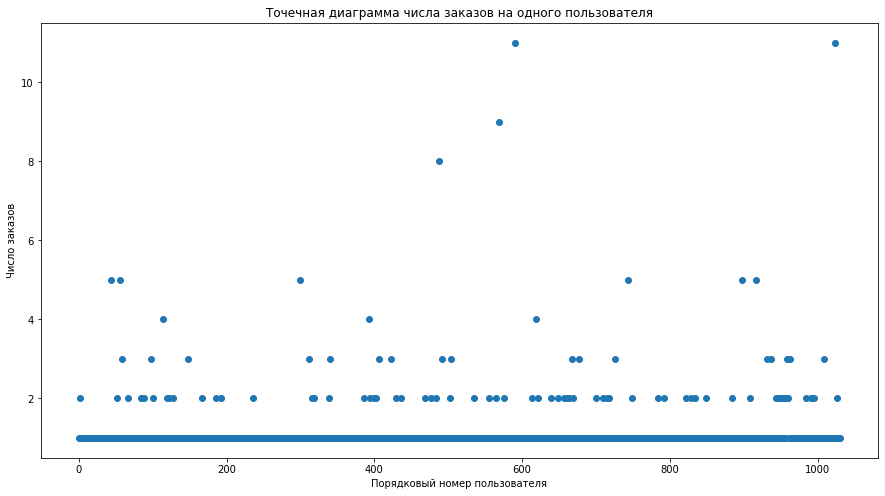

In [21]:
plt.figure(figsize=(15,8))

plt.title('Точечная диаграмма числа заказов на одного пользователя')

plt.xlabel('Порядковый номер пользователя') 

plt.ylabel('Число заказов') 

orders_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_users.columns = ['visitor_id', 'orders']

x_values = pd.Series(range(0,len(orders_users)))

plt.scatter(x_values, orders_users['orders']); 

Большинство пользователей сделали только 1 заказ, иногда встречаются пользователи, сделавшие 2 заказа. Намного меньше тех, кто сделал 3 заказа, количество пользователей, сделавших более 5 заказов, единично. 

Определение 95-го и 99-го перцентилей количества заказов на пользователя:

In [22]:
print(np.percentile(orders_users['orders'], [95, 99])) 

[2. 4.]


In [23]:
anomaly_border_1 = np.percentile(orders_users['orders'], [95])[0]
anomaly_border_1 

2.0

Не более 5% пользователей сделали более 2-х заказов и не более 1% более 4 заказов. 

Аномальными пользователями будут признаны те, кто сделал больше 2 заказов.

### Стоимость заказов

Точечный график стоимостей заказов:

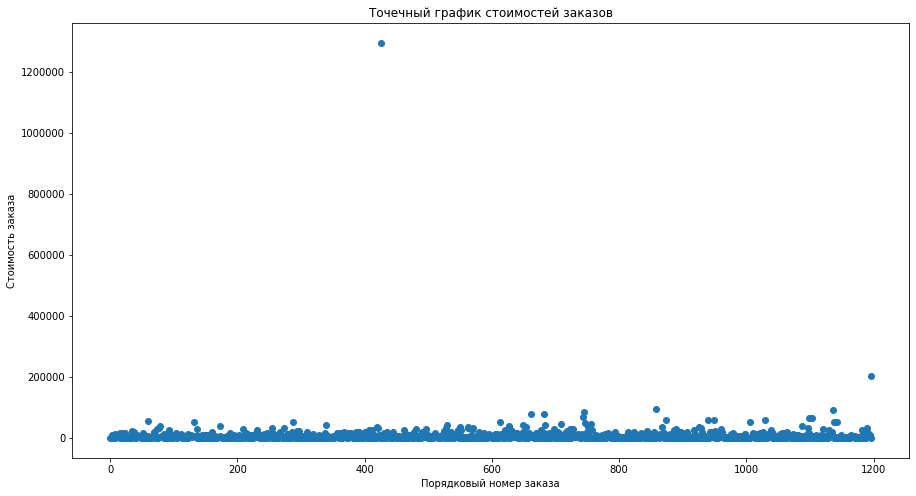

In [24]:
rev_total = orders['revenue']

plt.figure(figsize=(15,8))

plt.xlabel('Порядковый номер заказа') 

plt.ylabel('Стоимость заказа') 

plt.title('Точечный график стоимостей заказов')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
x_values = pd.Series(range(0,len(rev_total)))

plt.scatter(x_values, rev_total); 

На графике видно, что большая часть значений стоимости заказов находится в пределах примерно 30 тысяч. Необходимо посчитать 95-й и 99-й перцентили стоимости заказов. 

In [25]:
print(np.percentile(orders['revenue'], [95, 97.5, 99])) 

[28000.  39530.  58233.2]


In [26]:
anomaly_border_2 = np.percentile(orders['revenue'], [95])[0]
anomaly_border_2

28000.000000000004

Только 5% заказов стоят более 28 тысяч, 2,5% заказов - дороже 39,5 тысяч, и 1% - более 58,2 тыс. 
Граница для определения аномальных заказов будет определена на отметке в 28 тыс.

Время приступать к подсчёту статистической значимости различий в среднем количестве заказов на посетителя и в среднем чеке заказа между группами. Сначала данные будут подсчитаны для "сырых" данных, затем - для "очищенных".

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Для начала анализа необходимо сформулировать гипотезы:

H0: "Среди среднего количества заказов на посетителя нет статистически значимых различий между группами по "сырым" данным".

H1: "Среди среднего количества заказов на посетителя есть статистически значимые различия между группами по "сырым" данным".


А также подготовить данные:

In [27]:
visitors_a_per_day = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_per_day.columns = ['date', 'visitors_per_date_a']

visitors_b_per_day = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_per_day.columns = ['date', 'visitors_per_date_b']

visitors_cumul_a = visitors_a_per_day.apply(
    lambda x: visitors_a_per_day[visitors_a_per_day['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_cumul_a.columns = ['date', 'visitors_cumulative_a']

visitors_cumul_b = visitors_b_per_day.apply(
    lambda x: visitors_b_per_day[visitors_b_per_day['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_cumul_b.columns = ['date', 'visitors_cumulative_b']

orders_a_per_day = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_per_day.columns = ['date', 'orders_a_per_day', 'revenue_a_per_day']

orders_cumul_a = orders_a_per_day.apply(
    lambda x: orders_a_per_day[orders_a_per_day['date'] <= x['date']].agg(
        {'date': 'max', 'orders_a_per_day': 'sum', 'revenue_a_per_day': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cumul_a.columns = [
    'date',
    'orders_cumulative_a',
    'revenue_cumulative_a',
]

orders_b_per_day = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_per_day.columns = ['date', 'orders_b_per_day', 'revenue_b_per_day']


orders_cumul_b = orders_b_per_day.apply(
    lambda x: orders_b_per_day[orders_b_per_day['date'] <= x['date']].agg(
        {'date': 'max', 'orders_b_per_day': 'sum', 'revenue_b_per_day': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])


orders_cumul_b.columns = [
    'date',
    'orders_cumulative_b',
    'revenue_cumulative_b',
]

table_together = (
    orders_a_per_day.merge(
        orders_b_per_day, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cumul_a, left_on='date', right_on='date', how='left')
    .merge(orders_cumul_b, left_on='date', right_on='date', how='left')
    .merge(visitors_a_per_day, left_on='date', right_on='date', how='left')
    .merge(visitors_b_per_day, left_on='date', right_on='date', how='left')
    .merge(visitors_cumul_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cumul_b, left_on='date', right_on='date', how='left')
)

table_together.head(5)

,date,orders_a_per_day,revenue_a_per_day,orders_b_per_day,revenue_b_per_day,orders_cumulative_a,revenue_cumulative_a,orders_cumulative_b,revenue_cumulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cumulative_a,visitors_cumulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Данная таблица отображает следующую информацию:
* date - дату;
* orders_a_per_day - количество заказов в группе A в соответствующий день;
* revenue_a_per_day - выручка в группе A в соответствующий день;	
* orders_b_per_day - количество заказов в группе B в соответствующий день;
* revenue_b_per_day - выручка в группе B в соответствующий день;	 	
* orders_cumulative_a - суммарное число заказов в группе A по выбранную дату включительно;	
* revenue_cumulative_a - суммарная выручка в группе A по выбранную дату включительно;
* orders_cumulative_b - суммарное число заказов в группе В по выбранную дату включительно; 
* revenue_cumulative_b - суммарная выручка в группе В по выбранную дату включительно; 	
* visitors_per_date_a - количество пользователей в группе A в соответствующий день;
* visitors_per_date_b - количество пользователей в группе B в соответствующий день; 
* visitors_cumulative_a - суммарное количество пользователей в группе A по выбранную дату включительно;	
* visitors_cumulative_b - суммарное количество пользователей в группе B по выбранную дату включительно. 

Данная информация будет использована для подсчёта статистической значимости различия в среднем количестве заказов между группами. Для начала необходимо создать две новые переменные, orders_by_users_a и orders_by_users_b, содержащие информацию о количестве сделанных каждым пользователем заказов. Затем на их основе будут созданы итоговые таблицы sample_a и sample_b, которые будут содержать информацию из orders_by_users_a и orders_by_users_b соответственно, а также нули для пользователей, которые ничего не заказывали. 

In [28]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']


orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_a_per_day['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_b_per_day['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Финальный шаг - вычислить относительное различие в среднем между группами.
Также можно вычислить относительный прирост среднего числа заказов группы B:

In [29]:
alpha = 0.05
test_1 = stats.mannwhitneyu(sample_a, sample_b)
mean_1 = (sample_b.mean() / sample_a.mean() - 1) * 100
print('P-value составляет:', "{0:.3f}".format(test_1.pvalue)) 
print('Относительный прирост среднего числа заказов группы B равен:', "{0:.3f}".format(mean_1),'%')
if test_1.pvalue < alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value составляет: 0.017
Относительный прирост среднего числа заказов группы B равен: 13.808 %
Нулевая гипотеза отвергается


Согласно проведённому исследованию, среди среднего количества заказов на посетителя есть статистически значимые различия между группами по "сырым" данным. Относительный прирост среднего числа заказов группы B равен 13,8%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Данные для второго анализа готовы, необходимо сформулировать новые гипотезы:

H0: "В среднем чеке заказа нет статистически значимых различий между группами по "сырым" данным".

H1: "В среднем чеке заказа есть статистически значимые различия между группами по "сырым" данным".

In [30]:
test_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
mean_2 = (orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)*100

print('P-value составляет:', "{0:.3f}".format(test_2.pvalue)) 
print('Разница между средним чеком группы B и средним чеком группы А:', "{0:.3f}".format(mean_2),'%')
if test_2.pvalue < alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value составляет: 0.729
Разница между средним чеком группы B и средним чеком группы А: 25.871 %
Не получилось отвергнуть нулевую гипотезу


Согласно проведённому исследованию, в среднем чеке заказа нет статистически значимых различий между группами по "сырым" данным. Разница между средним чеком группы B и средним чеком группы А составляет 25,9%

Оба теста, проведённых с "сырыми" данными, показали, что результаты группы В лучше, чем результаты группы А.

Однако ранее было проанализировано, что в датасете присутствуют аномальные пользователи. Для полноты картины необходимо удалить эти данные и ещё раз провести оба теста, используя "очищенные" данные.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Сначала необходимо сформилировать гипотезы:

H0: "Среди среднего количества заказов на посетителя нет статистически значимых различий между группами по «очищенным» данным".

H1: "Среди среднего количества заказов на посетителя есть статистически значимые различия между группами по «очищенным» данным".

Следующий шаг - определить аномальных пользователей и их количество.

In [31]:
too_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > anomaly_border_1]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > anomaly_border_1]['visitor_id'],
    ],
    axis=0,
)

too_expensive_orders = orders[orders['revenue'] > anomaly_border_2]['visitor_id']

abnormal_users = (
    pd.concat([too_many_orders, too_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head())
print(abnormal_users.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64
74


Всего 74 аномальных пользователя.

In [32]:
sample_a_fil = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                table_together['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_fil = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                table_together['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Выборки готовы, можно применять к ним статистический критерий Манна-Уитни:

In [33]:
alpha = 0.05
test_3 = stats.mannwhitneyu(sample_a_fil, sample_b_fil)
mean_3 = (sample_b_fil.mean() / sample_a_fil.mean() - 1) * 100
print('P-value составляет:', "{0:.3f}".format(test_3.pvalue)) 
print('Относительный прирост среднего числа заказов группы B равен:', "{0:.3f}".format(mean_3),'%')
if test_3.pvalue < alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value составляет: 0.013
Относительный прирост среднего числа заказов группы B равен: 17.270 %
Нулевая гипотеза отвергается


Согласно проведённому исследованию, среди среднего количества заказов на посетителя есть статистически значимые различия между группами по "очищенным" данным. Относительный прирост среднего числа заказов группы B равен 17,3%, что больше аналогичного показателя у "сырых" данных (13,8%). P-value стал меньше (0.013 против 0.017).
Наконец, последний тест:

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Будут сформулированы гипотезы:

H0: "В среднем чеке заказа нет статистически значимых различий между группами по «очищенным» данным".

H1: "В среднем чеке заказа есть статистически значимые различия между группами по «очищенным» данным".

И подготовлены выборки:

In [34]:
orders_a_fil = orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue']


orders_b_fil = orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue']


Можно проводить тест:

In [35]:
alpha = 0.05
test_4 = stats.mannwhitneyu(orders_a_fil, orders_b_fil)
mean_4 = (orders_b_fil.mean() / orders_a_fil.mean() - 1) * 100
print('P-value составляет:', "{0:.3f}".format(test_4.pvalue)) 
print('Относительный прирост среднего числа заказов группы B равен:', "{0:.3f}".format(mean_4),'%')
if test_4.pvalue < alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value составляет: 0.738
Относительный прирост среднего числа заказов группы B равен: -1.962 %
Не получилось отвергнуть нулевую гипотезу


Согласно проведённому исследованию, в этот раз не получилось отвергнуть нулевую гипотезу. Это означает, что в среднем чеке заказа нет статистических значимых различий между группами по "очищенным" данным. Теперь разница между средним чеком группы B и средним чеком группы А составляет всего -2% (вместо 25,9% ранее), т.е группа B начала демонстрировать чуть более худшие показатели, чем группа А. P-value стал больше и составляет теперь 0,738 (против 0,729 в аналогичном тесте с "сырыми" данными).


**Итоги:**

В результате проведённого исследования были сделаны следующие открытия:
* График относительного изменения кумулятивного среднего чека группы B к группе A дпродемонстрировал, что показатели группы В были выше показателей группы А на протяжении всего исследуемого периода за исключением первых дней и краткосрочного провала в середине месяца (с 12 по 14 августа);
* График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A демонстрирует, что после начального "провала" группа В стабильно показывала более высокие результаты, чем группа А;
* Есть статистически значимое различие по среднему количеству заказов на посетителя между группами как по "сырым" данным, так и после фильтрации аномалий;
* Нет статистически значимых различий по среднему чеку заказа между группами как по "сырым" данным, так и по "очищенным";
* Результаты группы B почти всегда были выше результатов группы А.

На основании проведённого исследования рекомендуется остановить тест, признать его успешным и зафиксировать победу группы В.

## Итоги и выводы

Целью данного исследования являлся анализ крупного интернет-магазина, который состоял из двух частей: приоритизация гипотез для увеличения выручки из подготовленного списка и проведение A/B-теста с последующим анализом результатов. 

Для каждой части анализа имелись свои отдельные датафреймы: 1 датафрейм для первой части и 2 датафрейма для второй.

В рамках исследования была проделана следующая работа:
* Была проведена подготовка к анализу, а именно: осуществлена загрузка библиотек, данных, проведён первичный анализ каждого из трёх датафреймов и первичная обработка данных;
* Была выполнена приоритизация гипотез;
* ТОП-3 гипотезы в соответствии со фреймворком ICE:
    * Номер 8: "Запустить акцию, дающую скидку на товар в день рождения" - 16.20; 
    * Номер 0: "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" - 13.33; 
    * Номер 7: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" - 11.20; 
* ТОП-3 гипотезы в соответствии с фреймворком ICE:
    * Номер 7: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" - 112.00;   
    * Номер 2: "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" - 56.00;   
    * Номер 0: "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" - 40.00;    
    * Номер 6: "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" - 40.00;
* Наименее приоритетной гипотезой в обоих случаях был признан номер 4: "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей";
* Был проведён анализ A/B-теста со следующими результатами:
    * График относительного изменения кумулятивного среднего чека группы B к группе A продемонстрировал, что показатели группы В были выше показателей группы А на протяжении всего исследуемого периода за исключением нескольких дней;
    * График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A продемонстрировал, что после начального "провала" группа В стабильно показывала более высокие результаты, чем группа А;
    * Есть статистически значимое различие по среднему количеству заказов на посетителя между группами как по "сырым" данным, так и после фильтрации аномалий;
    * Нет статистически значимых различий по среднему чеку заказа между группами как по "сырым" данным, так и по "очищенным";
    * Результаты группы B всегда были выше результатов группы А (за несколькими исключениями);
* В финале была дана рекомендация остановить тест, признать его успешным и зафиксировать победу группы В.